In [1]:
from __future__ import print_function
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import glob

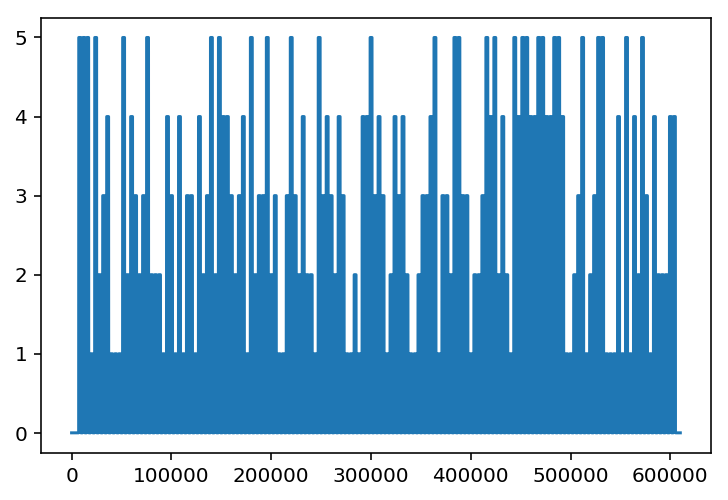

In [20]:
data_dir = 'C:/data2/dg'
cue = np.load(data_dir+'/bp/cue.npy')
plt.plot(cue)

raw_finger=[]
for i in range(5):
    finger = np.load(data_dir+'/bp/finger'+str(i)+'.npy')
    raw_finger.append(finger)

{'start': {0: array([ 19079,  39079,  43079,  47079,  91079, 103079, 111079, 123079,
       175079, 207079, 211079, 243079, 275079, 279079, 287079, 315079,
       339079, 343079, 367079, 399079, 439079, 495079, 499079, 515079,
       535079, 539079, 543079, 551079, 559079, 579079], dtype=int64), 1: array([ 27079,  55079,  67079,  79079,  83079,  87079, 131079, 143079,
       163079, 183079, 199079, 227079, 235079, 239079, 263079, 283079,
       319079, 335079, 347079, 379079, 403079, 407079, 427079, 435079,
       503079, 519079, 567079, 587079, 591079, 595079], dtype=int64), 2: array([ 31079,  63079,  71079,  99079, 115079, 119079, 135079, 159079,
       167079, 187079, 191079, 203079, 215079, 223079, 251079, 259079,
       271079, 303079, 311079, 327079, 351079, 355079, 371079, 375079,
       391079, 395079, 411079, 507079, 523079, 575079], dtype=int64), 3: array([ 35079,  59079,  95079, 107079, 127079, 151079, 155079, 171079,
       231079, 255079, 267079, 291079, 295079, 307079, 32

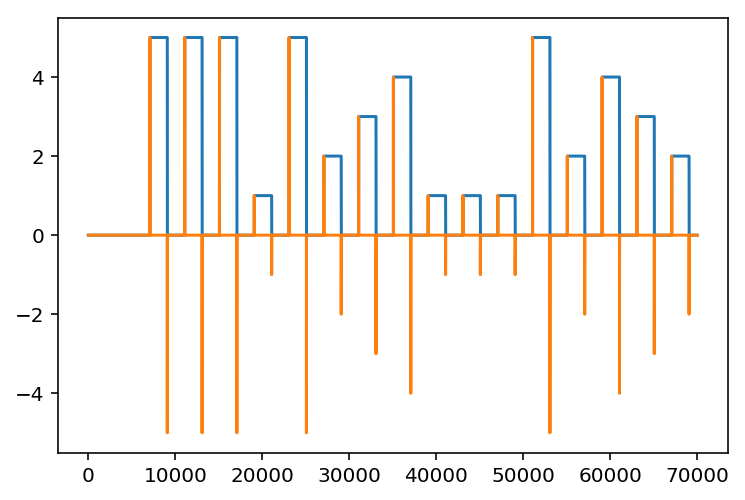

In [3]:
xx=np.diff(cue)
c={'start':{},'end':{}}
# c['start']={0:[],1:[],2:[],3:[],4:[]}
# c['end']={0:[],1:[],2:[],3:[],4:[]}
for i in range(5):
    c['start'][i] = np.where(xx==i+1)[0]
    c['end'][i] = np.where(xx==-i-1)[0]

plt.plot(cue[:70000])
plt.plot(xx[:70000])
print (c)

# Example start movement detection

In [4]:
example = raw_finger[2][:70000]

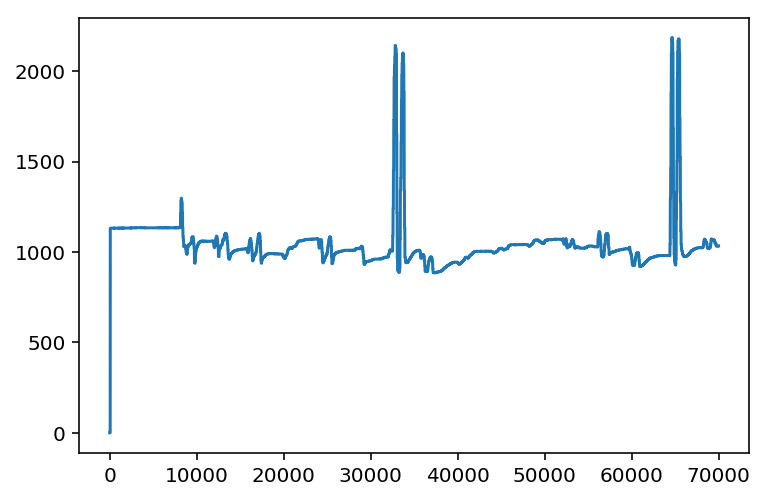

In [5]:
plt.plot(example)

(0, 700)

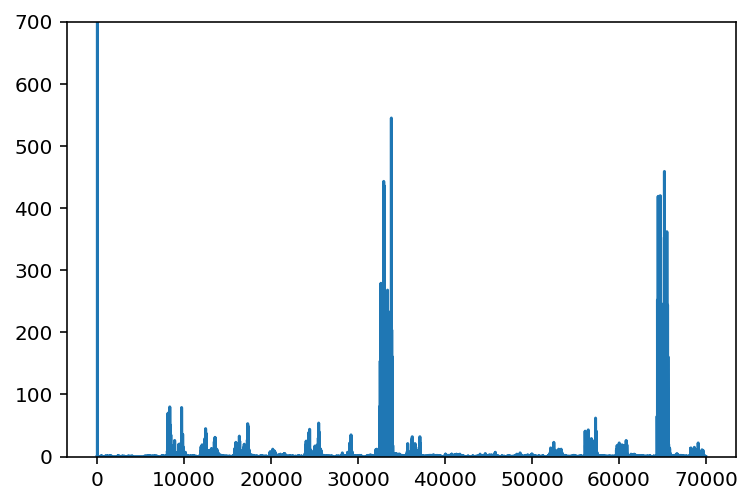

In [6]:
e_deriv = np.abs(np.diff(example))
plt.plot(e_deriv)
plt.ylim((0,700))

(0, 700)

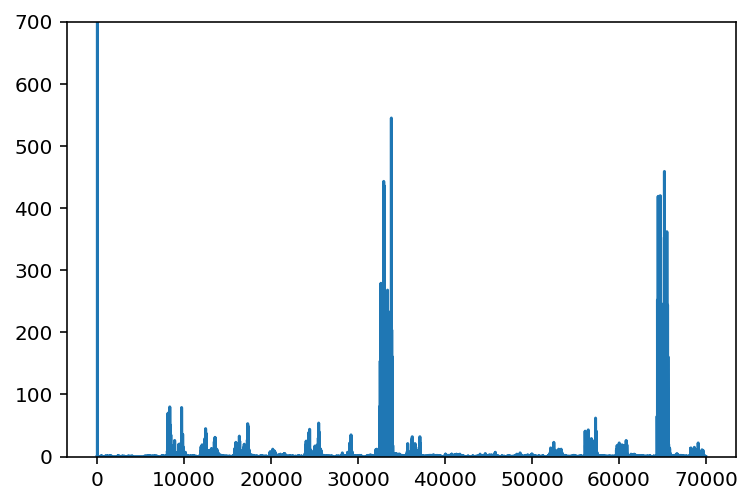

In [7]:
finger0_deriv = np.abs(np.diff(raw_finger[0]))
plt.plot(e_deriv)
plt.ylim((0,700))

In [8]:
#finger0_deriv = np.abs(np.diff(finger0))
#thresh = 50
#is_moving_finger0 = finger0_deriv > thresh
#move_samples_finger0 = np.argwhere(is_moving==1).transpose()[0]
#move_samples_diff_finger0 = np.diff(move_samples_finger0)

A function for calculating the 

In [9]:
def fingerStartEnd (finger, thresh = 50, time_thresh = 1000):
    all_start_samps = []
    all_end_samps = []

    finger_deriv = np.abs(np.diff(finger))
    is_moving = finger_deriv > thresh
    move_samples = np.argwhere(is_moving==1).transpose()[0]
    move_samples_diff = np.diff(move_samples)

    all_start_samps.append(move_samples[0])

    N_samps = len(move_samples)
    for i in range(1,N_samps):
        if move_samples_diff[i-1] > time_thresh:
            all_start_samps.append(move_samples[i])
            all_end_samps.append(move_samples[i-1])
    all_end_samps.append(move_samples[-1])
    return all_start_samps, all_end_samps

{0: [39, 19879, 40079, 44119, 48199, 91919, 103959, 112199, 123999, 176119, 208079, 211919, 243959, 276279, 280479, 288519, 315799, 319959, 340039, 344199, 347599, 367959, 400039, 439999, 496959, 499879, 515879, 536039, 539679, 542439, 544119, 552159, 559919, 579959, 595959], 1: [39, 20359, 28239, 32679, 56079, 64759, 68119, 72839, 80119, 84119, 86879, 97119, 100759, 105039, 113639, 116279, 120439, 132159, 136639, 144199, 164079, 168639, 184159, 199959, 216999, 221399, 225039, 228079, 235959, 239999, 245359, 249079, 252639, 260759, 264079, 272519, 284319, 304559, 311719, 319959, 329319, 336159, 339999, 341119, 345159, 347879, 351959, 356559, 372519, 376879, 380079, 392079, 396239, 405279, 408079, 412399, 416799, 421079, 427999, 432999, 435959, 441279, 443959, 449039, 456519, 476319, 480039, 485759, 496439, 500119, 504079, 509559, 519999, 524439, 540519, 549039, 565439, 568159, 571879, 575839, 580839, 588079, 592039, 595639, 600959], 2: [39, 8119, 9719, 17319, 25479, 32519, 57319, 64399

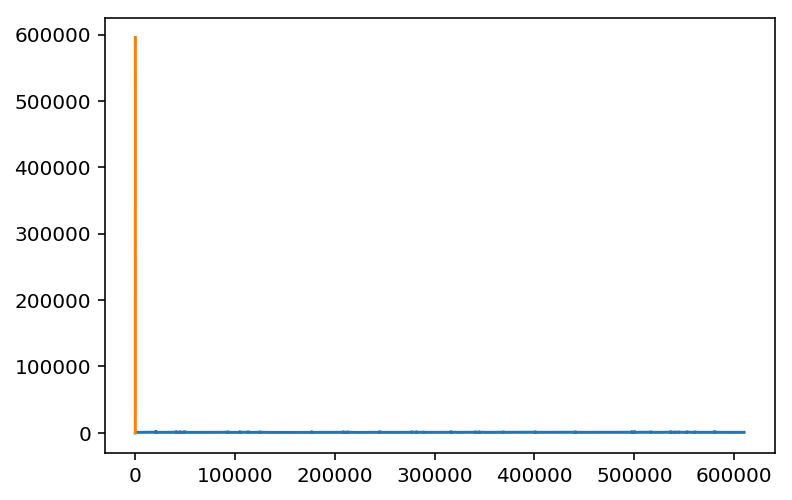

In [10]:
fingers={'start':{},'end':{}}
fingers['start']={0:[],1:[],2:[],3:[],4:[]}
fingers['end']={0:[],1:[],2:[],3:[],4:[]}
for i in range(5):
    fingers['start'][i],fingers['end'][i] = fingerStartEnd(raw_finger[i])
print(fingers['start'])
plt.plot(raw_finger[0])
plt.plot(fingers['start'][0])

(0, 70000)

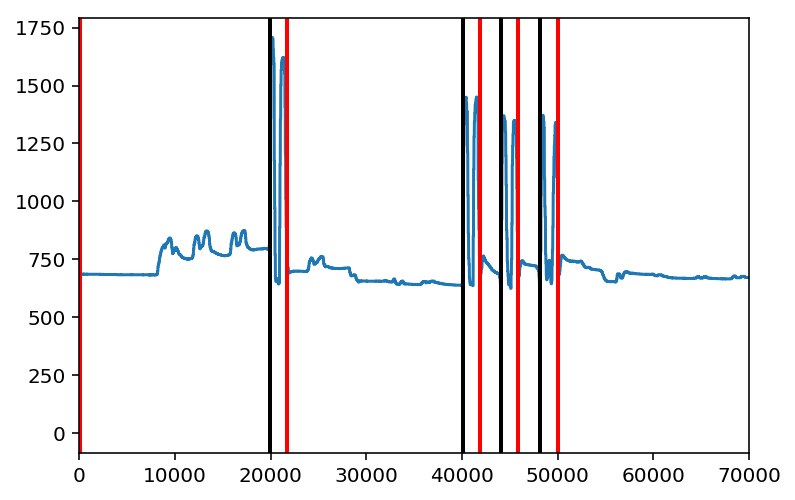

In [11]:
plt.plot(raw_finger[0])
for i,j in zip(fingers['start'][0],fingers['end'][0]):
    plt.axvline(x=i, ymin=0, ymax = 3000, linewidth=2, color='k')
    plt.axvline(x=j, ymin=0, ymax = 3000, linewidth=2, color='r')
plt.xlim(0,70000)


Plot the start and end for five fingers.

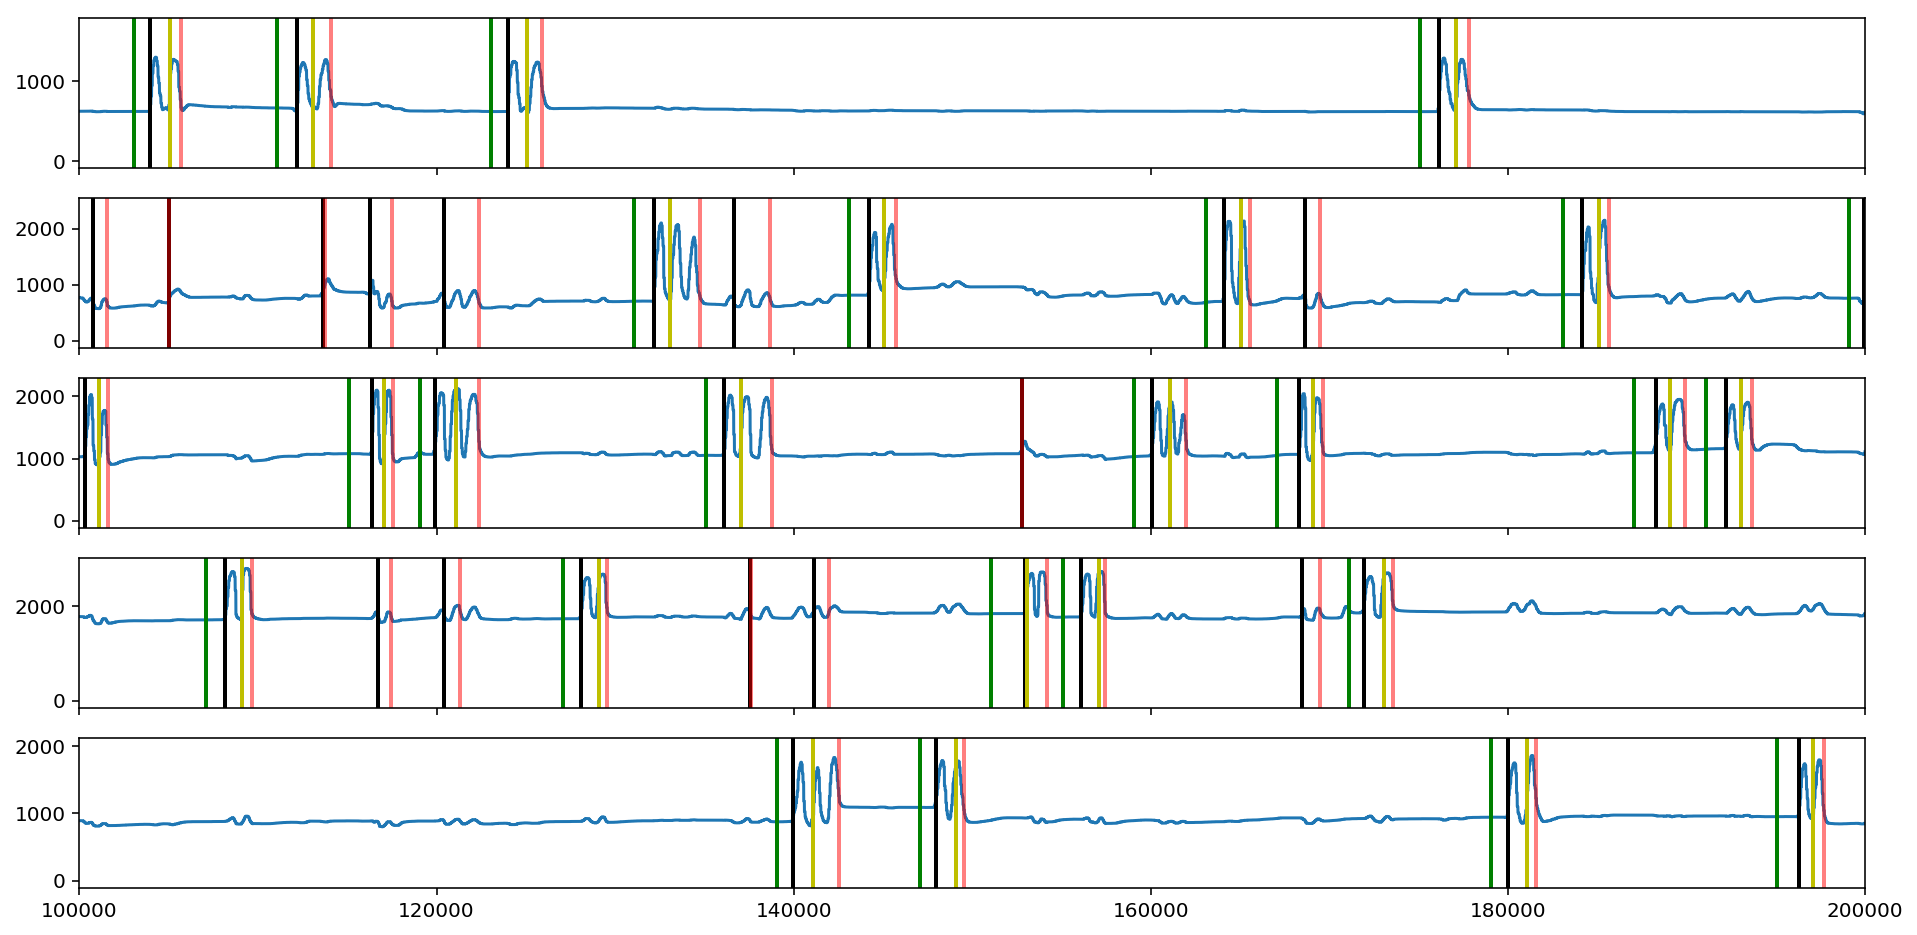

In [12]:
plt.figure(figsize=(16,8))
f, sub = plt.subplots(5, sharex=True,figsize=(16,8))
for k in range(5):
    sub[k].plot(raw_finger[k])
    
    for i,j in zip(fingers['start'][k],fingers['end'][k]):
        sub[k].axvline(x=i, ymin=0, ymax = 3000, linewidth=2, color='k')
        sub[k].axvline(x=j, ymin=0, ymax = 3000, linewidth=2, color='r', alpha=0.5)
    for cueS, cueE in zip(c['start'][k],c['end'][k]):
        sub[k].axvline(x=cueS, ymin=0, ymax = 3000, linewidth=2, color='g')
        sub[k].axvline(x=cueE, ymin=0, ymax = 3000, linewidth=2, color='y')
    plt.xlim(100000,200000)
    
def deleteStartEnd(fingers,interval):
    for k in range(5):
        for i, j in zip(fingers['start'][k],fingers['end'][k]):
            if (j-i<interval):
                fingers['start'][k].remove(i)
                fingers['end'][k].remove(j)

                
    
    




['bp', 'cc', 'ht', 'jc', 'jp', 'wc', 'wm', 'zt']


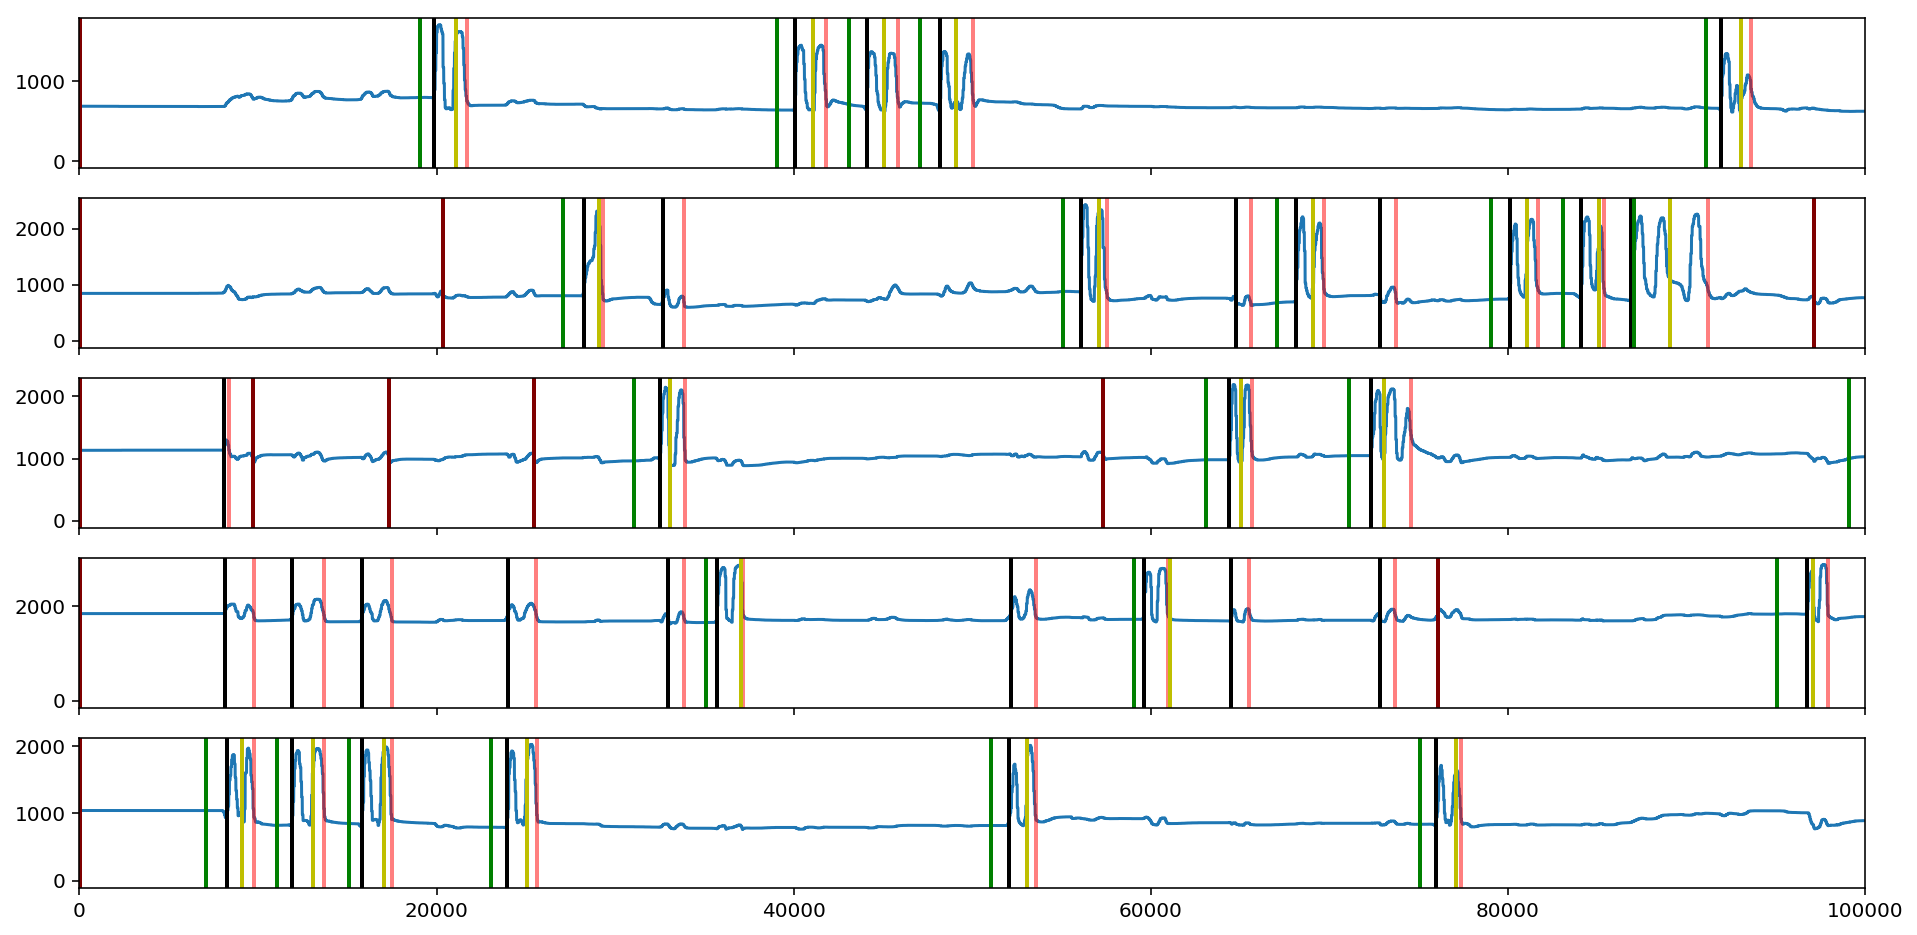

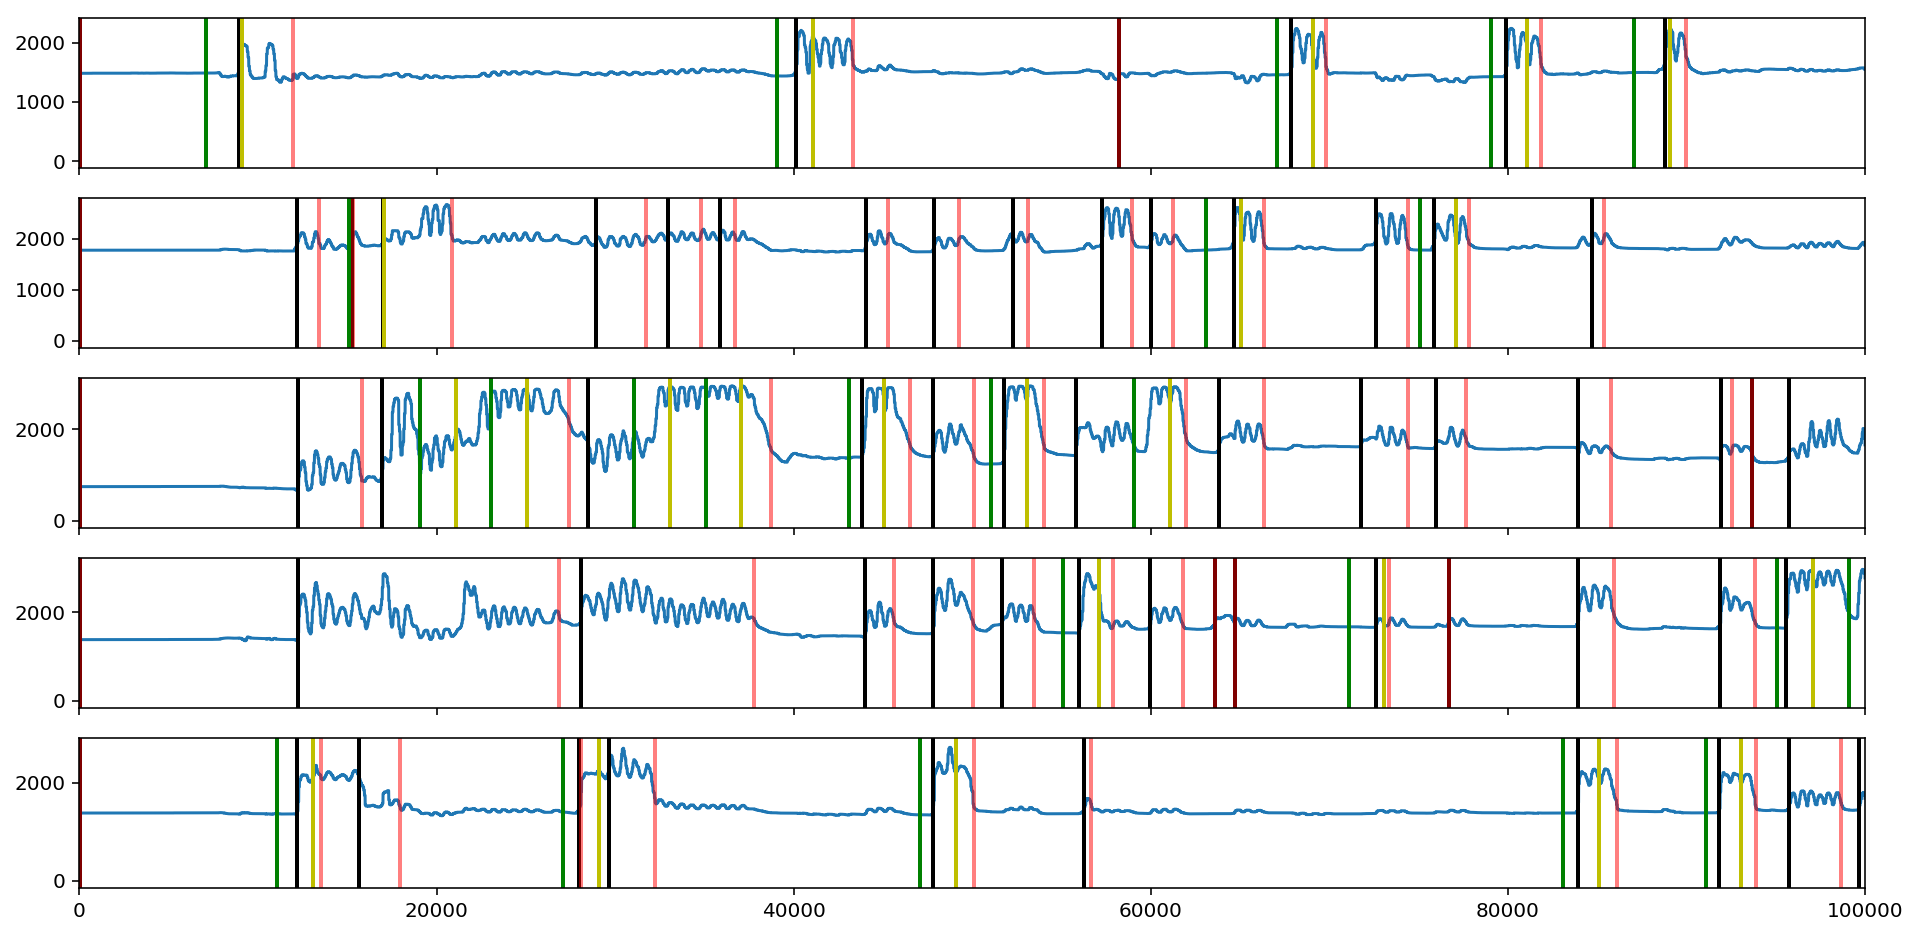

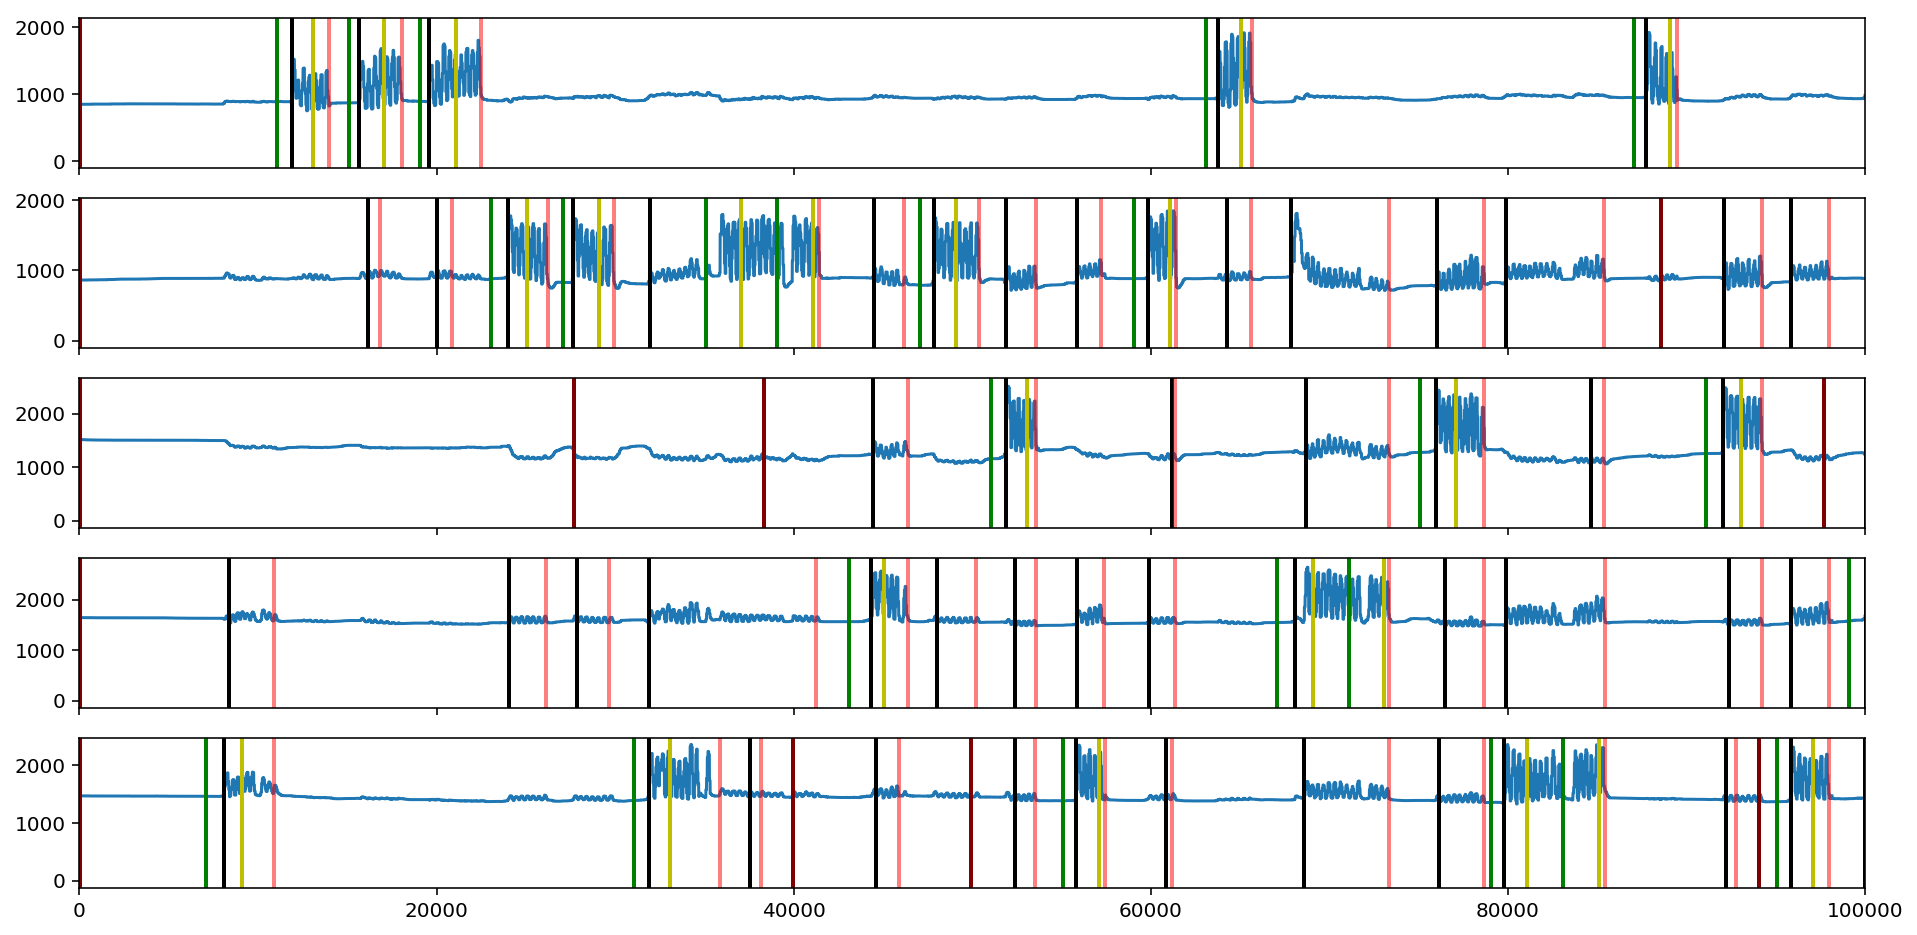

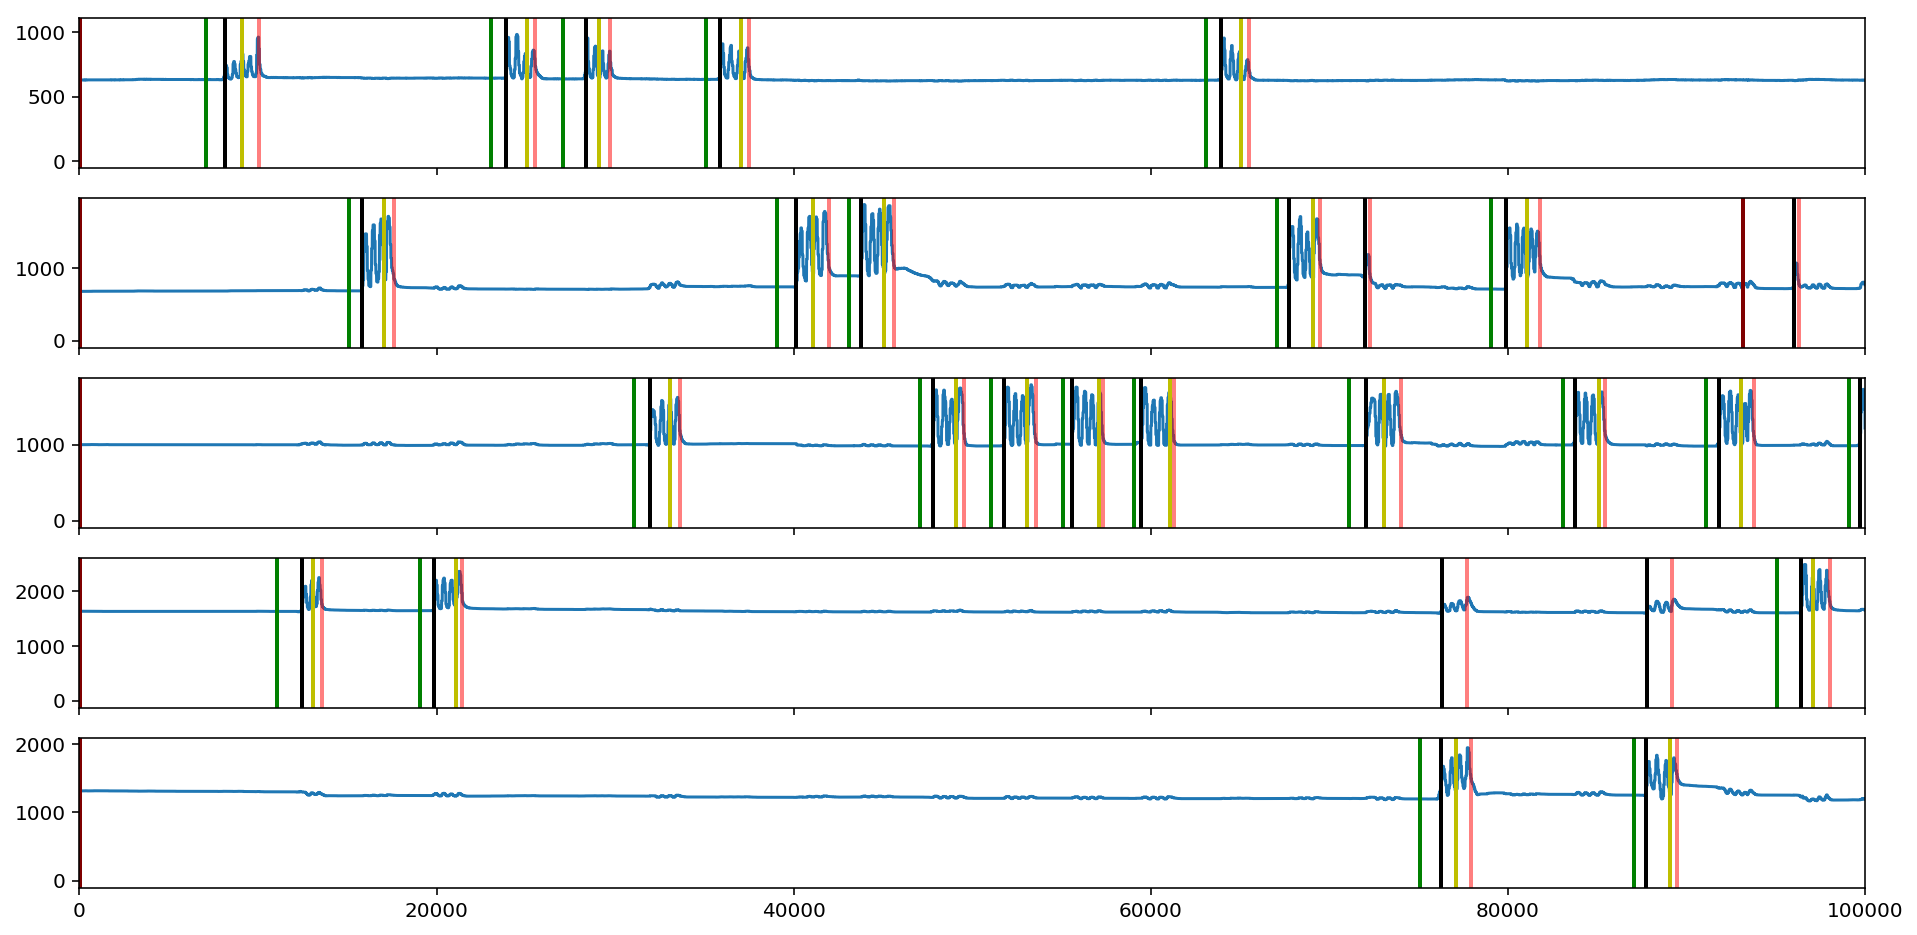

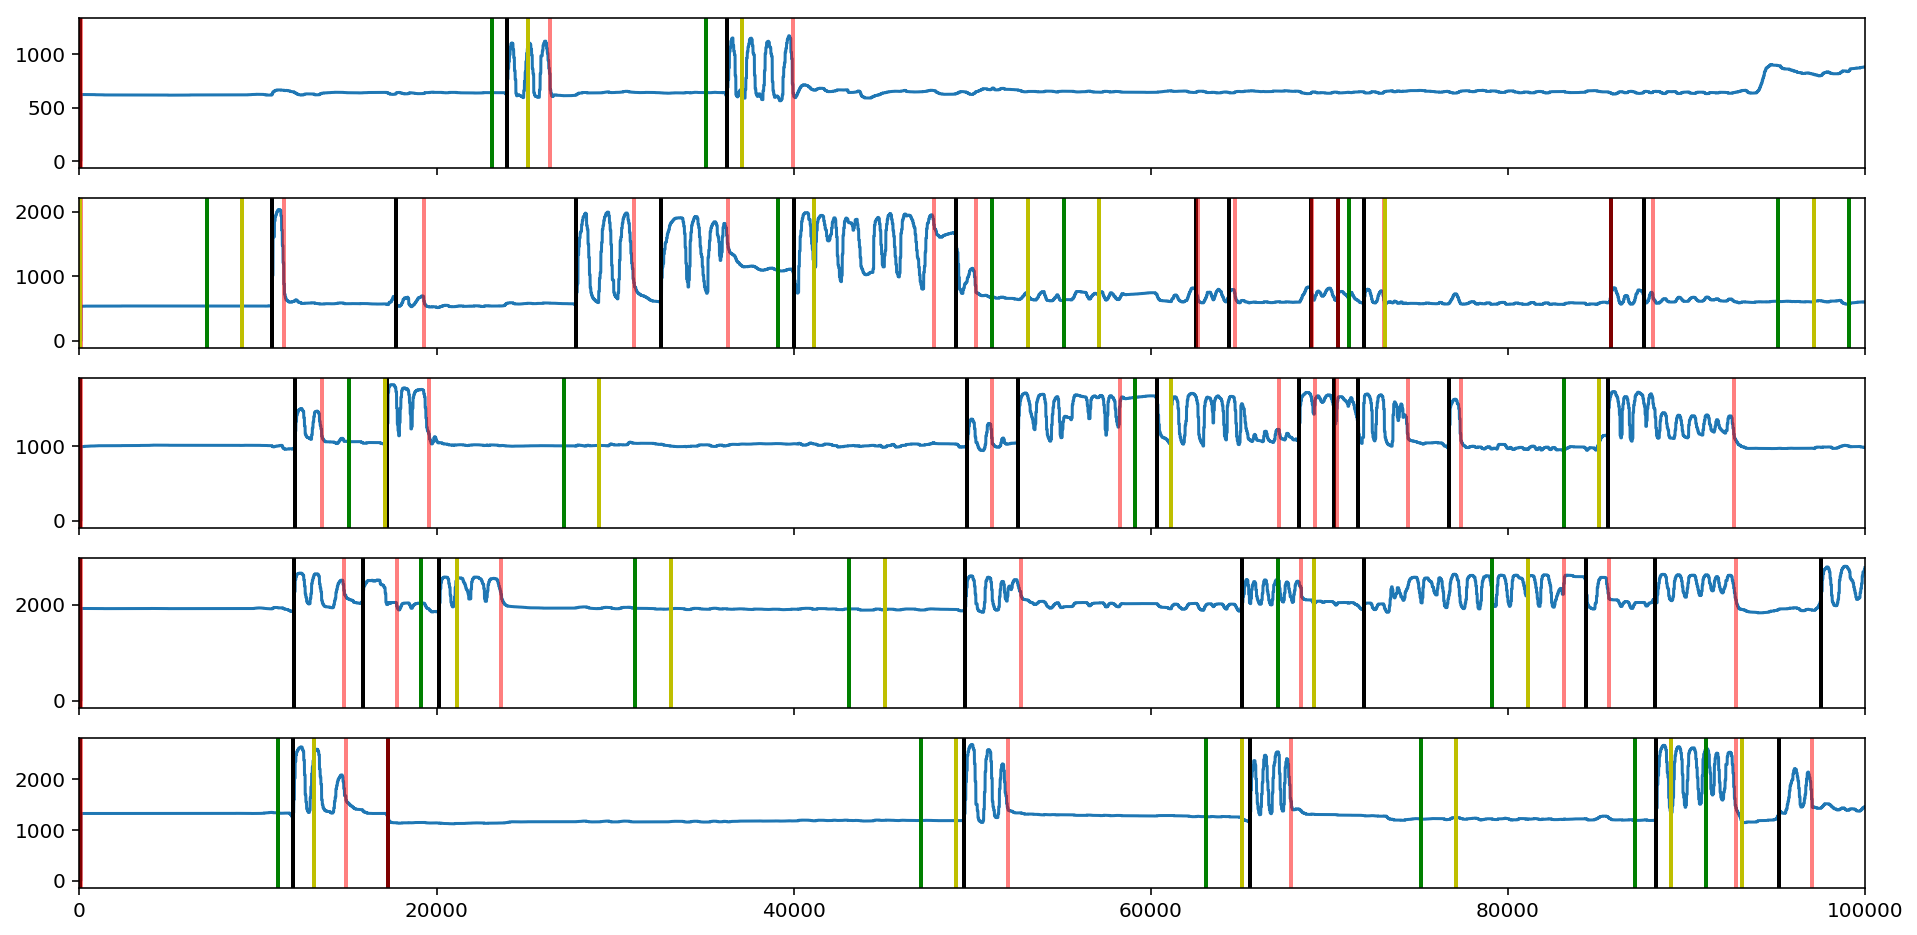

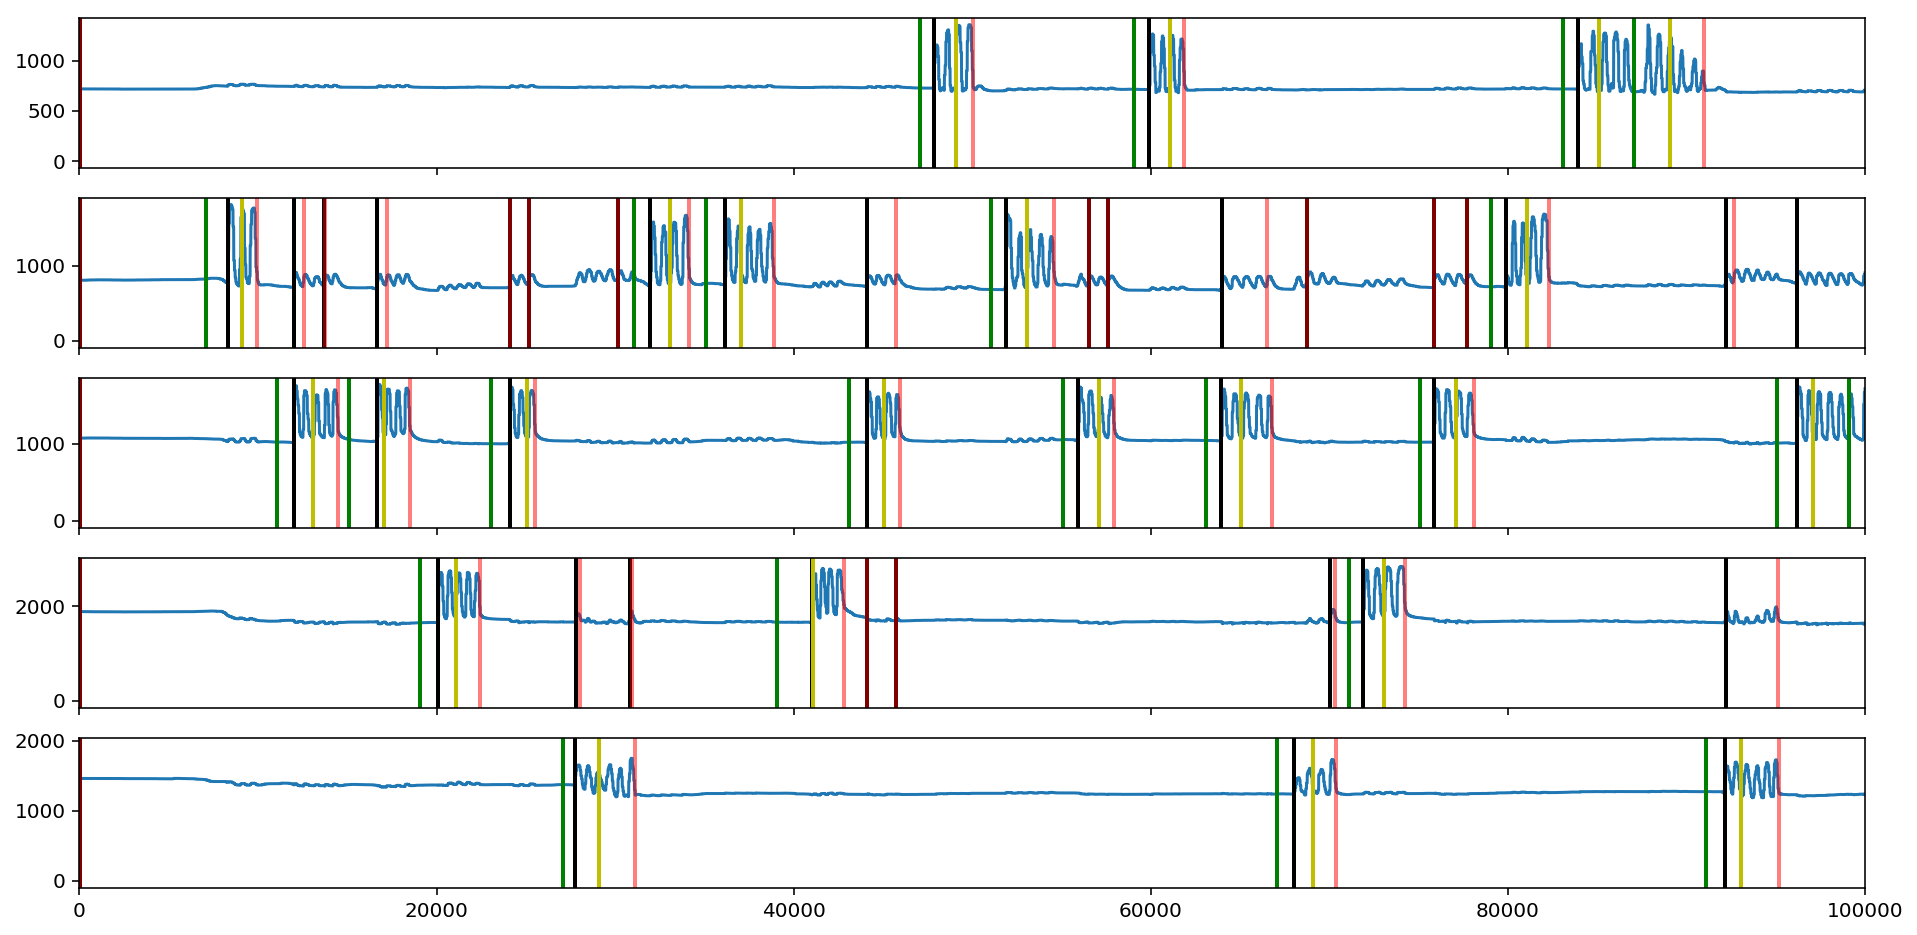

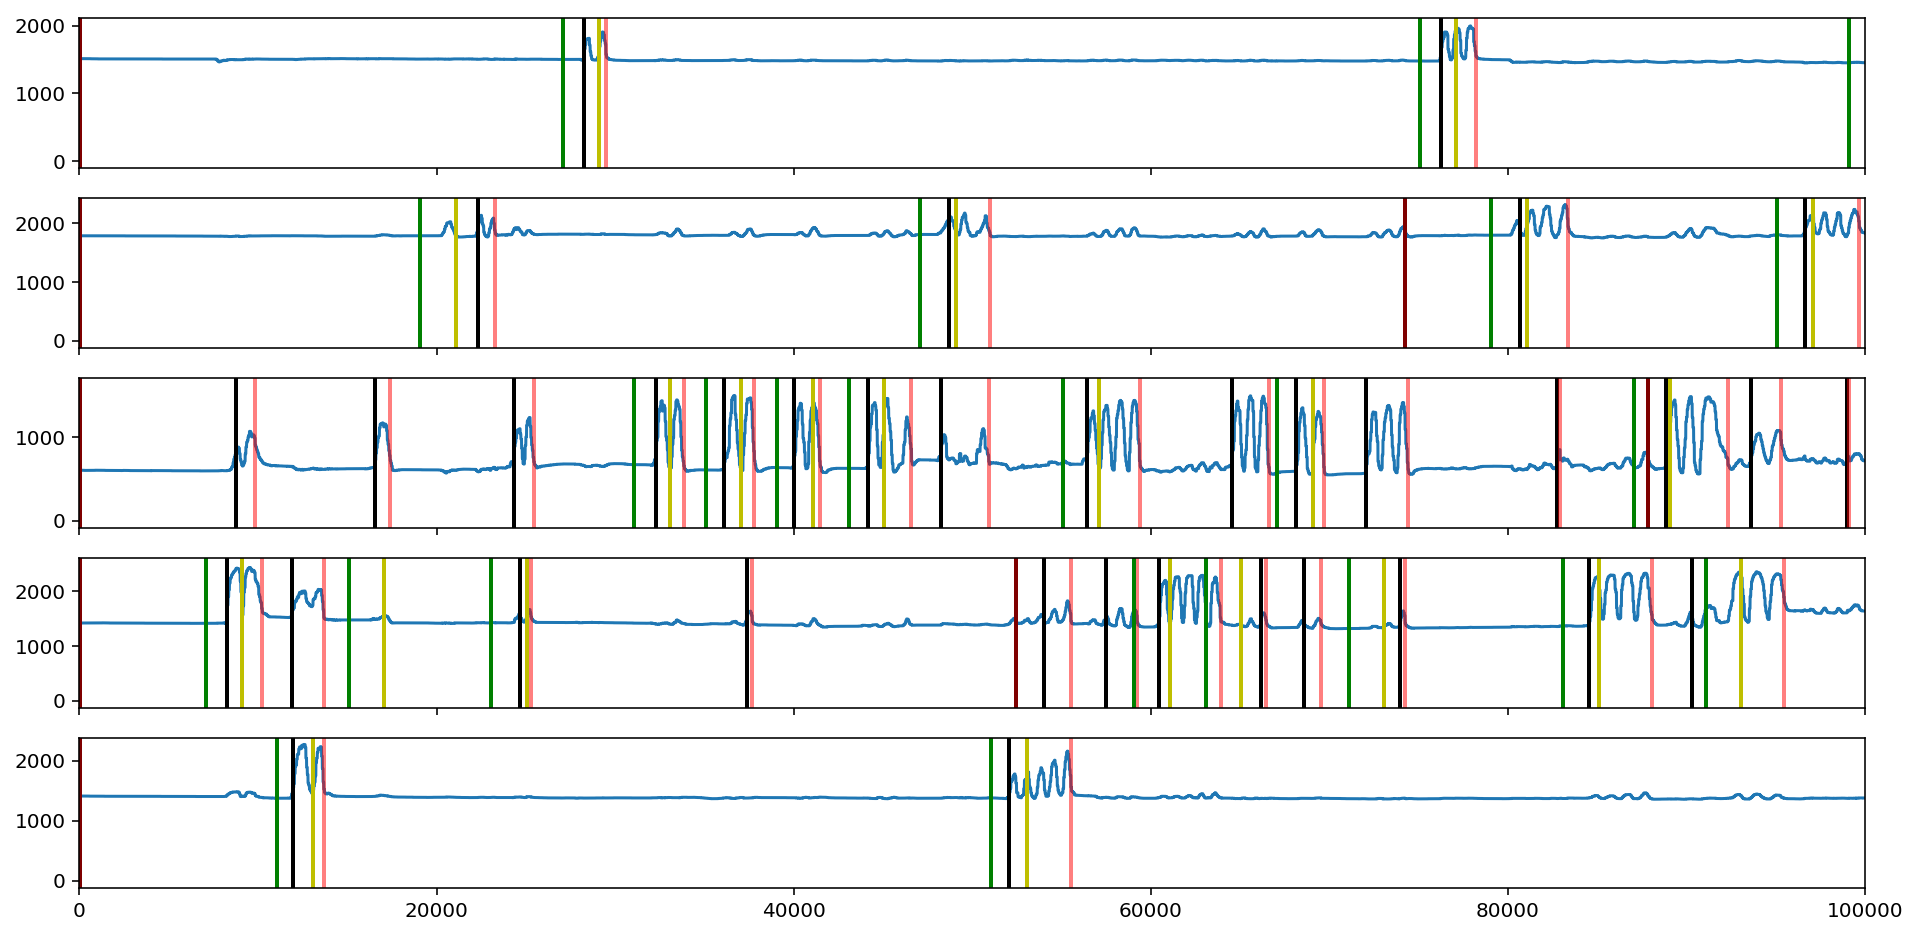

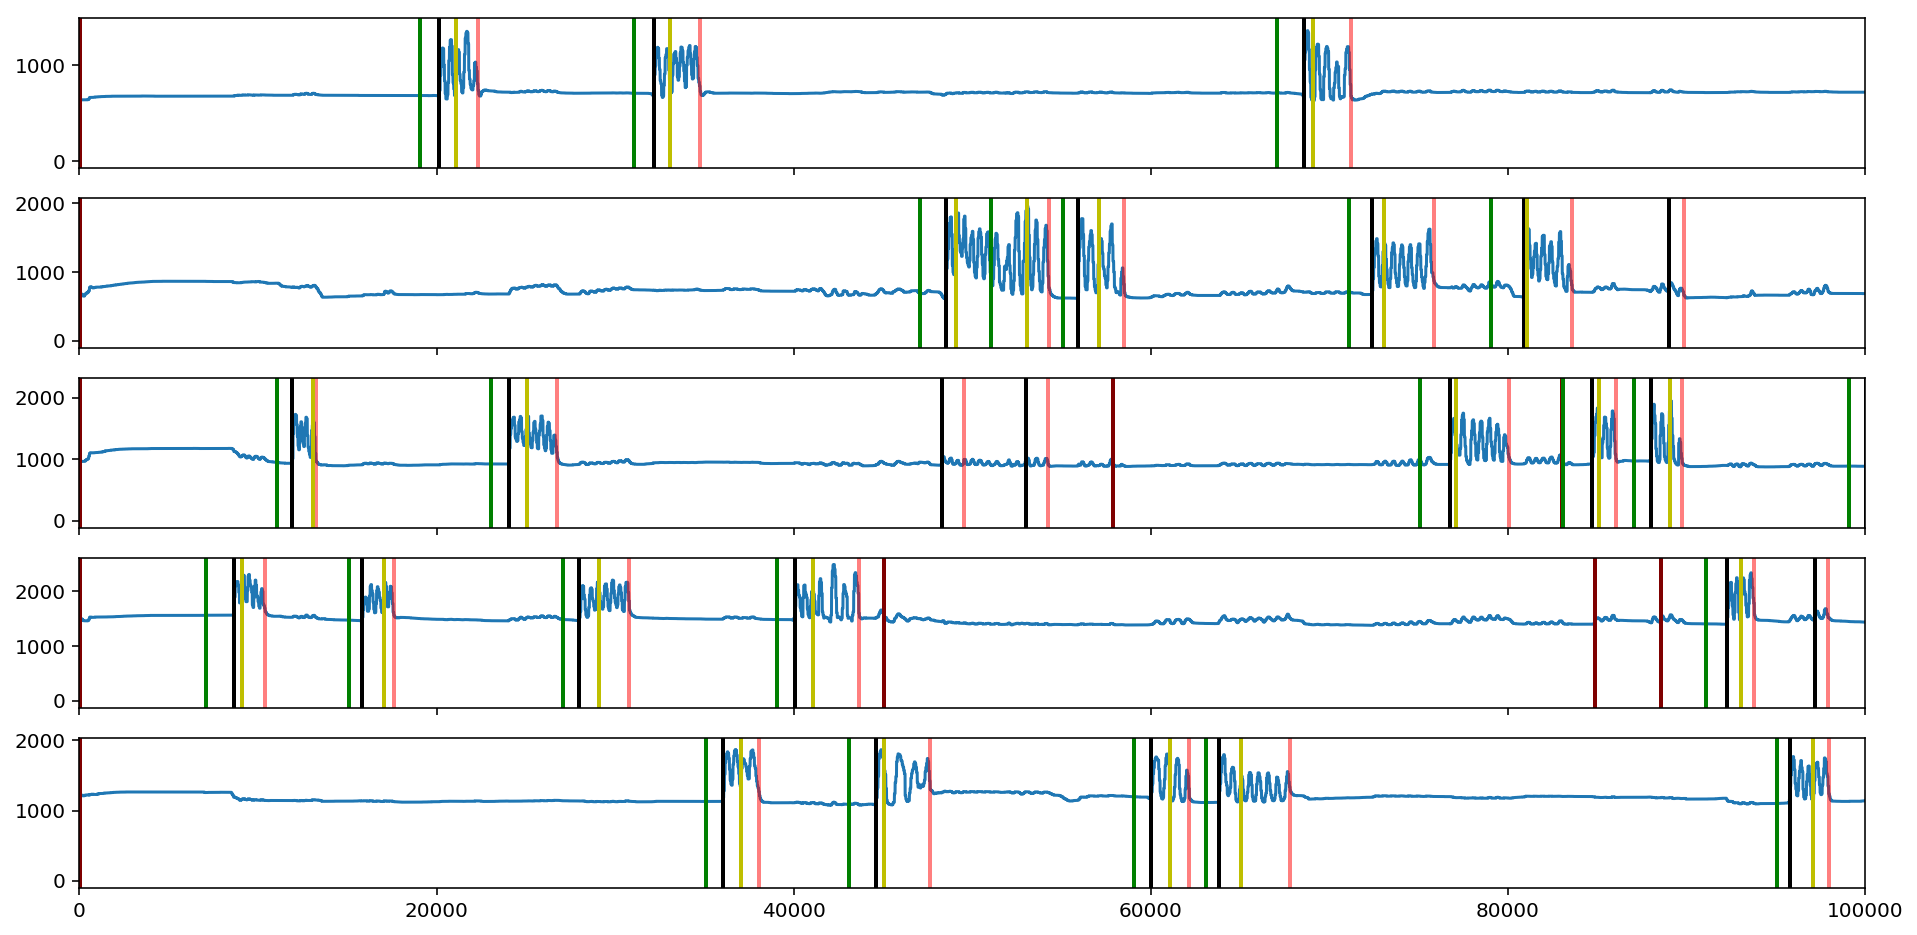

In [21]:
subj_name = 2
subjects = glob.glob(data_dir+'/*')
all_subjects = []
all_subj_fingers={}
all_cues={}

for sub in subjects:
    
    if len(sub) == len(data_dir)+1+subj_name:
        file_name = sub[-subj_name:]
        all_subjects.append(file_name)
print(all_subjects)
for subjcode in all_subjects:
    
    cue = np.load(data_dir+'/'+subjcode+'/cue.npy')
    xx=np.diff(cue)
    all_cues[subjcode]={'start':{},'end':{}}
    for index in range(5):
        all_cues[subjcode]['start'][index] = np.where(xx==index+1)[0]
        all_cues[subjcode]['end'][index] = np.where(xx==-index-1)[0]
    raw_finger=[]
    all_subj_fingers[subjcode]={'start':{},'end':{}}
    for i in range(5):
        finger = np.load(data_dir+'/'+subjcode+'/finger'+str(i)+'.npy')
        raw_finger.append(finger)
        
        all_subj_fingers[subjcode]['start'][i],all_subj_fingers[subjcode]['end'][i]=fingerStartEnd(finger)
        
    plt.figure(figsize=(16,8))

    f, sub = plt.subplots(5, sharex=True,figsize=(16,8))
    for k in range(5):
        sub[k].plot(raw_finger[k])
       
        for start,end in zip(all_subj_fingers[subjcode]['start'][k],all_subj_fingers[subjcode]['end'][k]):
            sub[k].axvline(x=start, ymin=0, ymax = 3000, linewidth=2, color='k')
            sub[k].axvline(x=end, ymin=0, ymax = 3000, linewidth=2, color='r', alpha=0.5)
        for cueS, cueE in zip(all_cues[subjcode]['start'][k],all_cues[subjcode]['end'][k]):
            sub[k].axvline(x=cueS, ymin=0, ymax = 3000, linewidth=2, color='g')
            sub[k].axvline(x=cueE, ymin=0, ymax = 3000, linewidth=2, color='y')
        plt.xlim(0,100000)


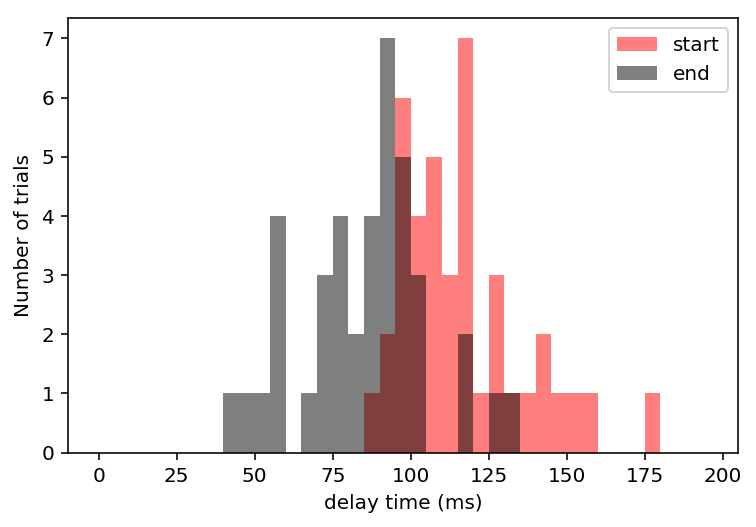

In [14]:
# plotting delay times
delaysS = np.random.randn(40)*20 + 120
delaysE = np.random.randn(40)*20 + 80
plt.hist(delaysS,bins=np.arange(0,200,5),color='r',alpha=.5,label='start')
plt.hist(delaysE,bins=np.arange(0,200,5),color='k',alpha=.5,label='end')
plt.xlabel('delay time (ms)')
plt.ylabel('Number of trials')
plt.legend(loc='best')

In [27]:
delayStart={}
delayEnd={}
for i in range(5):
    delayStart[i]=[]
    delayEnd[i]=[]
    for start in all_cues['bp']['start'][i]:
        move_start=np.array(all_subj_fingers['bp']['start'][i])
        delayStart[i].append(move_start[move_start>start][0]-start)
    for end in all_cues['bp']['end'][i]:
        move_end=np.array(all_subj_fingers['bp']['end'][i])
        delayEnd[i].append(move_end[move_end>end][0]-end)

In [33]:
delayEnd[0]

[600,
 760,
 760,
 960,
 520,
 600,
 1000,
 840,
 720,
 640,
 800,
 640,
 760,
 1400,
 1000,
 160,
 1480,
 320,
 400,
 640,
 680,
 1280,
 400,
 200,
 400,
 160,
 680,
 8240,
 240,
 240]

{0: [800, 1000, 1040, 1120, 840, 880, 1120, 920, 1040, 1000, 840, 880, 1200, 1400, 1440, 720, 960, 1120, 880, 960, 920, 1880, 800, 800, 960, 600, 1040, 1080, 840, 880], 1: [1160, 1000, 1040, 1040, 1040, 10040, 1080, 1120, 1000, 1080, 880, 1000, 880, 920, 1000, 1240, 880, 1080, 800, 1000, 2200, 1000, 920, 880, 1000, 920, 1080, 1000, 960, 560], 2: [1440, 1320, 1280, 1240, 1280, 840, 1040, 1000, 1240, 1200, 1120, 840, 1080, 1480, 1160, 1200, 920, 1120, 640, 1080, 1040, 1000, 1080, 1440, 1320, 1040, 960, 2160, 1000, 760], 3: [640, 520, 1680, 1080, 1000, 1880, 1040, 840, 800, 920, 680, 1160, 720, 840, 1040, 960, 880, 920, 1640, 1160, 800, 720, 920, 880, 1040, 1120, 960, 920, 1040, 1040], 4: [1160, 840, 720, 880, 1000, 920, 880, 880, 920, 1240, 1160, 1040, 1560, 1040, 1160, 960, 880, 800, 800, 920, 680, 1360, 880, 1080, 1040, 800, 920, 1120, 9760, 800]}
{0: [600, 760, 760, 960, 520, 600, 1000, 840, 720, 640, 800, 640, 760, 1400, 1000, 160, 1480, 320, 400, 640, 680, 1280, 400, 200, 400, 160, 

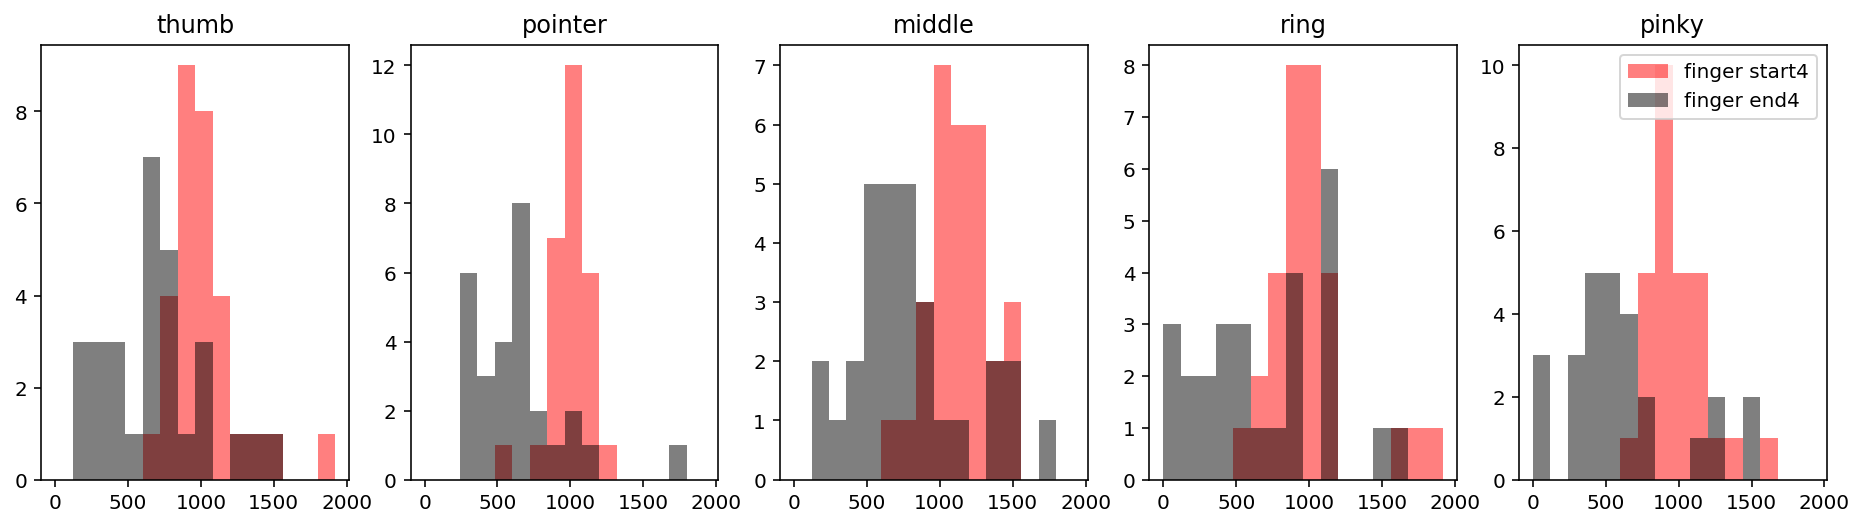

In [34]:
plt.figure(figsize=(16,4))
print(delayStart)
print(delayEnd)

finger_names = ['thumb','pointer','middle','ring','pinky']

colorArr=['r','k','b','g','y']
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.title(finger_names[i])
    plt.hist(delayStart[i],bins=np.arange(0,2000,120),color='r',alpha=.5,label='finger start'+str(i))
    plt.hist(delayEnd[i],bins=np.arange(0,2000,120),color='k', alpha=.5,label='finger end'+str(i))
plt.legend(loc='best')

In [16]:
cue_start = 500
move_start = np.array([100, 330, 530, 590])
move_start[move_start>cue_start][0]

530

# Structure behavioral data into Pandas dataframe

* Loop through each cue_start (each trial)
* For each cue_start also find:
    * cue_end
    * finger
    * move start
    * move end
    * delay start
    * delay end
    * duration move
    
each column as a key in a dictionary

In [35]:
import pandas as pd

In [36]:
delayStart

{0: [800,
  1000,
  1040,
  1120,
  840,
  880,
  1120,
  920,
  1040,
  1000,
  840,
  880,
  1200,
  1400,
  1440,
  720,
  960,
  1120,
  880,
  960,
  920,
  1880,
  800,
  800,
  960,
  600,
  1040,
  1080,
  840,
  880],
 1: [1160,
  1000,
  1040,
  1040,
  1040,
  10040,
  1080,
  1120,
  1000,
  1080,
  880,
  1000,
  880,
  920,
  1000,
  1240,
  880,
  1080,
  800,
  1000,
  2200,
  1000,
  920,
  880,
  1000,
  920,
  1080,
  1000,
  960,
  560],
 2: [1440,
  1320,
  1280,
  1240,
  1280,
  840,
  1040,
  1000,
  1240,
  1200,
  1120,
  840,
  1080,
  1480,
  1160,
  1200,
  920,
  1120,
  640,
  1080,
  1040,
  1000,
  1080,
  1440,
  1320,
  1040,
  960,
  2160,
  1000,
  760],
 3: [640,
  520,
  1680,
  1080,
  1000,
  1880,
  1040,
  840,
  800,
  920,
  680,
  1160,
  720,
  840,
  1040,
  960,
  880,
  920,
  1640,
  1160,
  800,
  720,
  920,
  880,
  1040,
  1120,
  960,
  920,
  1040,
  1040],
 4: [1160,
  840,
  720,
  880,
  1000,
  920,
  880,
  880,
  920,
  124